***TP2 - Apprentissage par perceptron multi-couche sous sklearn***

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

Extraction des échantillons de tests et d'entraînement :

In [3]:
from sklearn import model_selection
import numpy as np

sample = np.random.randint(70000, size = 5000)
sampleX = mnist.data[sample]
sampleY = mnist.target[sample]

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(sampleX, sampleY,
train_size=0.8)

Création du modèle : 

In [5]:
from sklearn import neural_network
mlpc = neural_network.MLPClassifier(hidden_layer_sizes = 50)

Entraînement + Test -> 0.9485

In [25]:
mlpc.fit(xtrain,ytrain)
mlpc.score(xtest,ytest)

0.9485238095238095

Vérification de la prédiction sur mnist.data[4] :

In [41]:
print("Classe étiquettée : " + mnist.target[4])
print("Classe prédite : " + mlpc.predict(mnist.data[4].reshape(1,-1))[0])

Classe étiquettée : 9
Classe prédite : 9


Vérification de la prédiction sur mnist.data[4] :

In [43]:
from sklearn import metrics
metrics.precision_score(ytest, mlpc.predict(xtest),average='micro')

0.9485238095238095

Evaluation du modèle en fonction du nombre de couches

In [47]:
scores = []

for i in [2,10,20,50,100]:
    print(i)
    couches = []
    for j in range(0,i):
        couches.append(50)
    mlpc = neural_network.MLPClassifier(hidden_layer_sizes = couches)
    mlpc.fit(xtrain,ytrain)
    scores.append(mlpc.score(xtest,ytest))

2
10
20
50
100


ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

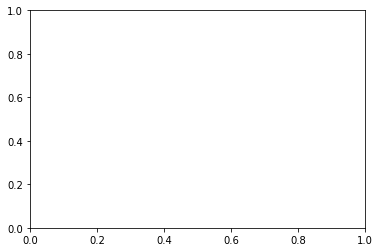

In [73]:
import matplotlib.pyplot as plt
plt.plot([2,10,20,50,100], scores, '-o')
plt.xlabel("Nombre de couches")
plt.ylabel("Précision")
plt.title("Précision en fonction du nombre de couches")
plt.show()

Test sur un modèle avec 50 couches contenant de 60 à 11 neurones : **118 secondes et une précision de 70%**

In [6]:
import time
couches = []
for i in range(11,61):
    couches.insert(0,i)
t1 = time.time()
mlpc = neural_network.MLPClassifier(hidden_layer_sizes = couches)
mlpc.fit(xtrain,ytrain)
print("Took " + str(time.time() - t1) + " secs.")
print(mlpc.score(xtest,ytest))

Took 3.2257463932037354 secs.
0.208


/home/thomas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Test sur un modèle avec 20 couches contenant de 60 à 11 neurones :
**194 secondes et une précision de 97%**

In [9]:
import time
couches = []
for i in range(11,61,3):
    couches.insert(0,i)

mlpc = neural_network.MLPClassifier(hidden_layer_sizes = couches)

t1 = time.time()
mlpc.fit(xtrain,ytrain)
print("Took " + str(time.time() - t1) + " secs to train.")


t1 = time.time()
print(mlpc.score(xtest,ytest))
print("Took " + str(time.time() - t1) + " secs to score.")

Took 16.697432279586792 secs to train.
0.913
Took 0.059857845306396484 secs to score.


Test de la précision des différents solveurs avec une seule couche de 50 neurones :

In [105]:
import time
from sklearn import neural_network

solvers = ["lbfgs","sgd","adam"]
times = []
precisions = []
for i in solvers:
    print(i)
    t1 = time.time()
    mlpc = neural_network.MLPClassifier(max_iter=1000,hidden_layer_sizes = (100), solver = i)
    mlpc.fit(xtrain,ytrain)
    times.append(time.time() - t1)
    precisions.append(mlpc.score(xtest,ytest))

lbfgs
sgd
adam


Affichage :

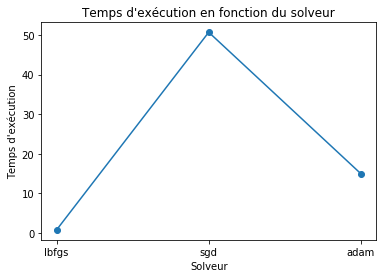

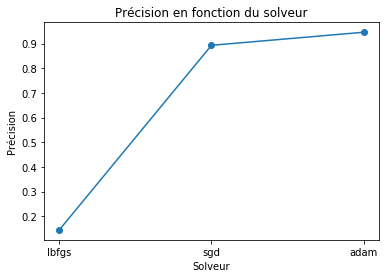

In [106]:
import matplotlib.pyplot as plt
plt.plot(solvers, times, '-o')
plt.xlabel("Solveur")
plt.ylabel("Temps d'exécution")
plt.title("Temps d'exécution en fonction du solveur")
plt.show()
plt.plot(solvers, precisions, '-o')
plt.xlabel("Solveur")
plt.ylabel("Précision")
plt.title("Précision en fonction du solveur")
plt.show()

In [90]:
#%who
#%reset -f

couches	 fetch_openml	 i	 j	 metrics	 mlpc	 mnist	 model_selection	 neural_network	 
np	 plt	 precisions	 sample	 sampleX	 sampleY	 scores	 solvers	 t1	 
time	 times	 xtest	 xtrain	 ytest	 ytrain	 
